# How to use USGS-MAP-gwmodels


In [1]:
from pathlib import Path
import numpy as np
from mfsetup.grid import MFsetupGrid
from mapgwm.framework import setup_model_layers, plot_slice

flopy is installed in /home/travis/miniconda/envs/test/lib/python3.7/site-packages/flopy


#### Define some input for all preprocessing

In [2]:
test_data_path = Path('../mapgwm/tests/data')
output_folder = Path('output')
output_folder.mkdir(exist_ok=True)  # make the output folder if it doesn't exist

# model grid for the MS Delta inset model
ncol=270
nrow=605
dxy=500.
delr = np.ones(ncol) * dxy
delc = np.ones(nrow) * dxy
delta_inset_model_grid = MFsetupGrid(delc, delr, top=None, botm=None,
                                     lenuni=2, epsg=5070,
                                     xoff=434955, yoff=1040285, angrot=0.0)

## Set up the model layering and property zones
from AEM-based voxel data and raster surfaces of hydrogeologic contacts

#### Define some input

In [3]:
# mean dem values for each 1 km gridcell, elevation units of feet
dem_means_raster = test_data_path / 'rasters/dem_mean_elevs_1000.tif'

# AEM electrical resistivity-based facies classes from tempest and resolve surveys
# (All facies classes version)
facies_classes_netcdf = test_data_path / 'netcdf/RSTM_res_fac_depth_15m.nc'

# Original MERAS framework (1 mi resolution), elevation units of feet
framework_rasters = [
    test_data_path / 'rasters/vkbg_surf.tif',  # Vicksburg-Jackson Group (top)
    test_data_path / 'rasters/ucaq_surf.tif',  # Upper Claiborne aquifer (top)
    test_data_path / 'rasters/mccu_surf.tif',  # Middle Claiborne confining unit (t
    test_data_path / 'rasters/mcaq_surf.tif',  # Middle Claiborne aquifer (top)
    test_data_path / 'rasters/lccu_surf.tif',  # Lower Claiborne confining unit (to
    test_data_path / 'rasters/lcaq_surf.tif',  # Lower Claiborne aquifer (top)
    test_data_path / 'rasters/mwaq_surf.tif',  # Middle Wilcox aquifer (top)
    test_data_path / 'rasters/lwaq_surf.tif',  # Lower Wilcox aquifer (top)
    test_data_path / 'rasters/mdwy_surf.tif',  # Midway confining unit (top)
]
framework_unit_names = [
    'Undifferentiated sediments\nabove the Vicksburg',
    'Vicksburg-Jackson Group',
    'Upper Claiborne aquifer',
    'Middle Claiborne confining unit',
    'Middle Claiborne aquifer',
    'Lower Claiborne confining unit',
    'Lower Claiborne aquifer',
    'Middle Wilcox aquifer',
    'Lower Wilcox aquifer'
]


In [4]:
layers, zone_array = setup_model_layers(dem_means_raster,
                                        facies_classes_netcdf,
                                        framework_rasters,
                                        delta_inset_model_grid,
                                        facies_class_variable='fac_a',  # variable in facies_classes_netcdf with facies zones
                                        dem_elevation_units='feet',
                                        framework_raster_elevation_units='feet',
                                        model_length_units='meters', output_folder=output_folder,
                                        framework_unit_names=framework_unit_names)

reading data from ../mapgwm/tests/data/rasters/dem_mean_elevs_1000.tif...
finished in 0.05s
reading data from ../mapgwm/tests/data/rasters/vkbg_surf.tif...
finished in 0.03s
reading data from ../mapgwm/tests/data/rasters/ucaq_surf.tif...
finished in 0.03s
reading data from ../mapgwm/tests/data/rasters/mccu_surf.tif...
finished in 0.03s
reading data from ../mapgwm/tests/data/rasters/mcaq_surf.tif...
finished in 0.03s
reading data from ../mapgwm/tests/data/rasters/lccu_surf.tif...
finished in 0.03s
reading data from ../mapgwm/tests/data/rasters/lcaq_surf.tif...
finished in 0.03s
reading data from ../mapgwm/tests/data/rasters/mwaq_surf.tif...
finished in 0.03s
reading data from ../mapgwm/tests/data/rasters/lwaq_surf.tif...
finished in 0.03s
reading data from ../mapgwm/tests/data/rasters/mdwy_surf.tif...
finished in 0.03s
computing cell thicknesses...
finished in 6.08s

computing cell thicknesses...
finished in 13.25s

wrote output/botm_array/model_top.tif
wrote output/botm_array/botm0.tif

In [5]:
framework_unit_labels = dict(zip(range(13, 32), framework_unit_names))

<AxesSubplot:title={'center':'Row 100'}, xlabel='Column in model', ylabel='Elevation, in meters'>

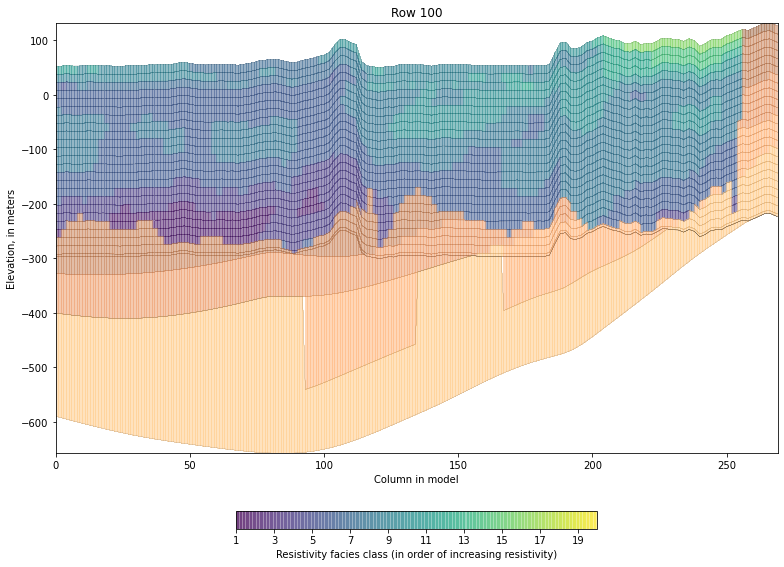

In [6]:
plot_slice(layers, property_data=zone_array,
           row=100, column=slice(None),
           voxel_start_layer=0, voxel_zones=np.arange(1, 21), cmap='copper',
           voxel_cmap='viridis', unit_labels=framework_unit_labels)